<a href="https://colab.research.google.com/github/afullhart/climateanalogs/blob/main/Figures/Variable_scatterplots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
%reset -f

In [9]:

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['Zonal_nday.csv.xml', 'Zonal_orgm.csv.xml', 'Zonal_tavg.csv', 'Zonal_pphh.csv.xml', 'Zonal_slpe.csv', 'Zonal_gras.csv.xml', 'Zonal_ylat.csv', 'Zonal_tavg.csv.xml', 'Zonal_tree.csv', 'Zonal_tree.csv.xml', 'Zonal_eroR.csv.xml', 'Zonal_shrN.csv.xml', 'Zonal_orgm.csv', 'Zonal_ylat.csv.xml', 'Zonal_pphh.csv', 'Zonal_shrN.csv', 'Zonal_slpe.csv.xml', 'Zonal_nday.csv', 'Zonal_pfgN.csv.xml', 'Zonal_litr.csv', 'Zonal_pfgN.csv', 'Zonal_eco4.csv', 'Zonal_eco3.csv', 'Zonal_bare.csv', 'Zonal_gras.csv', 'Zonal_graN.csv', 'schema.ini', 'Zonal_elev.csv.xml', 'Zonal_eroR.csv', 'Zonal_bare.csv.xml', 'Zonal_bulk.csv.xml', 'Zonal_eco3.csv.xml', 'Zonal_elev.csv', 'Zonal_bulk.csv', 'Zonal_clay.csv.xml', 'Zonal_eco4.csv.xml', 'Zonal_litr.csv.xml', 'Zonal_accm.csv', 'Zonal_clay.csv', 'Zonal_graN.csv.xml', 'Zonal_accm.csv.xml']


,color
0,#FBAF1C
1,#FF611B
2,#00FE24
3,#18F2FE
4,#E21DFD
5,#91FE28
6,#F4714F
7,#F8E019
8,#BDBEBE
9,#CCFE29


DONE


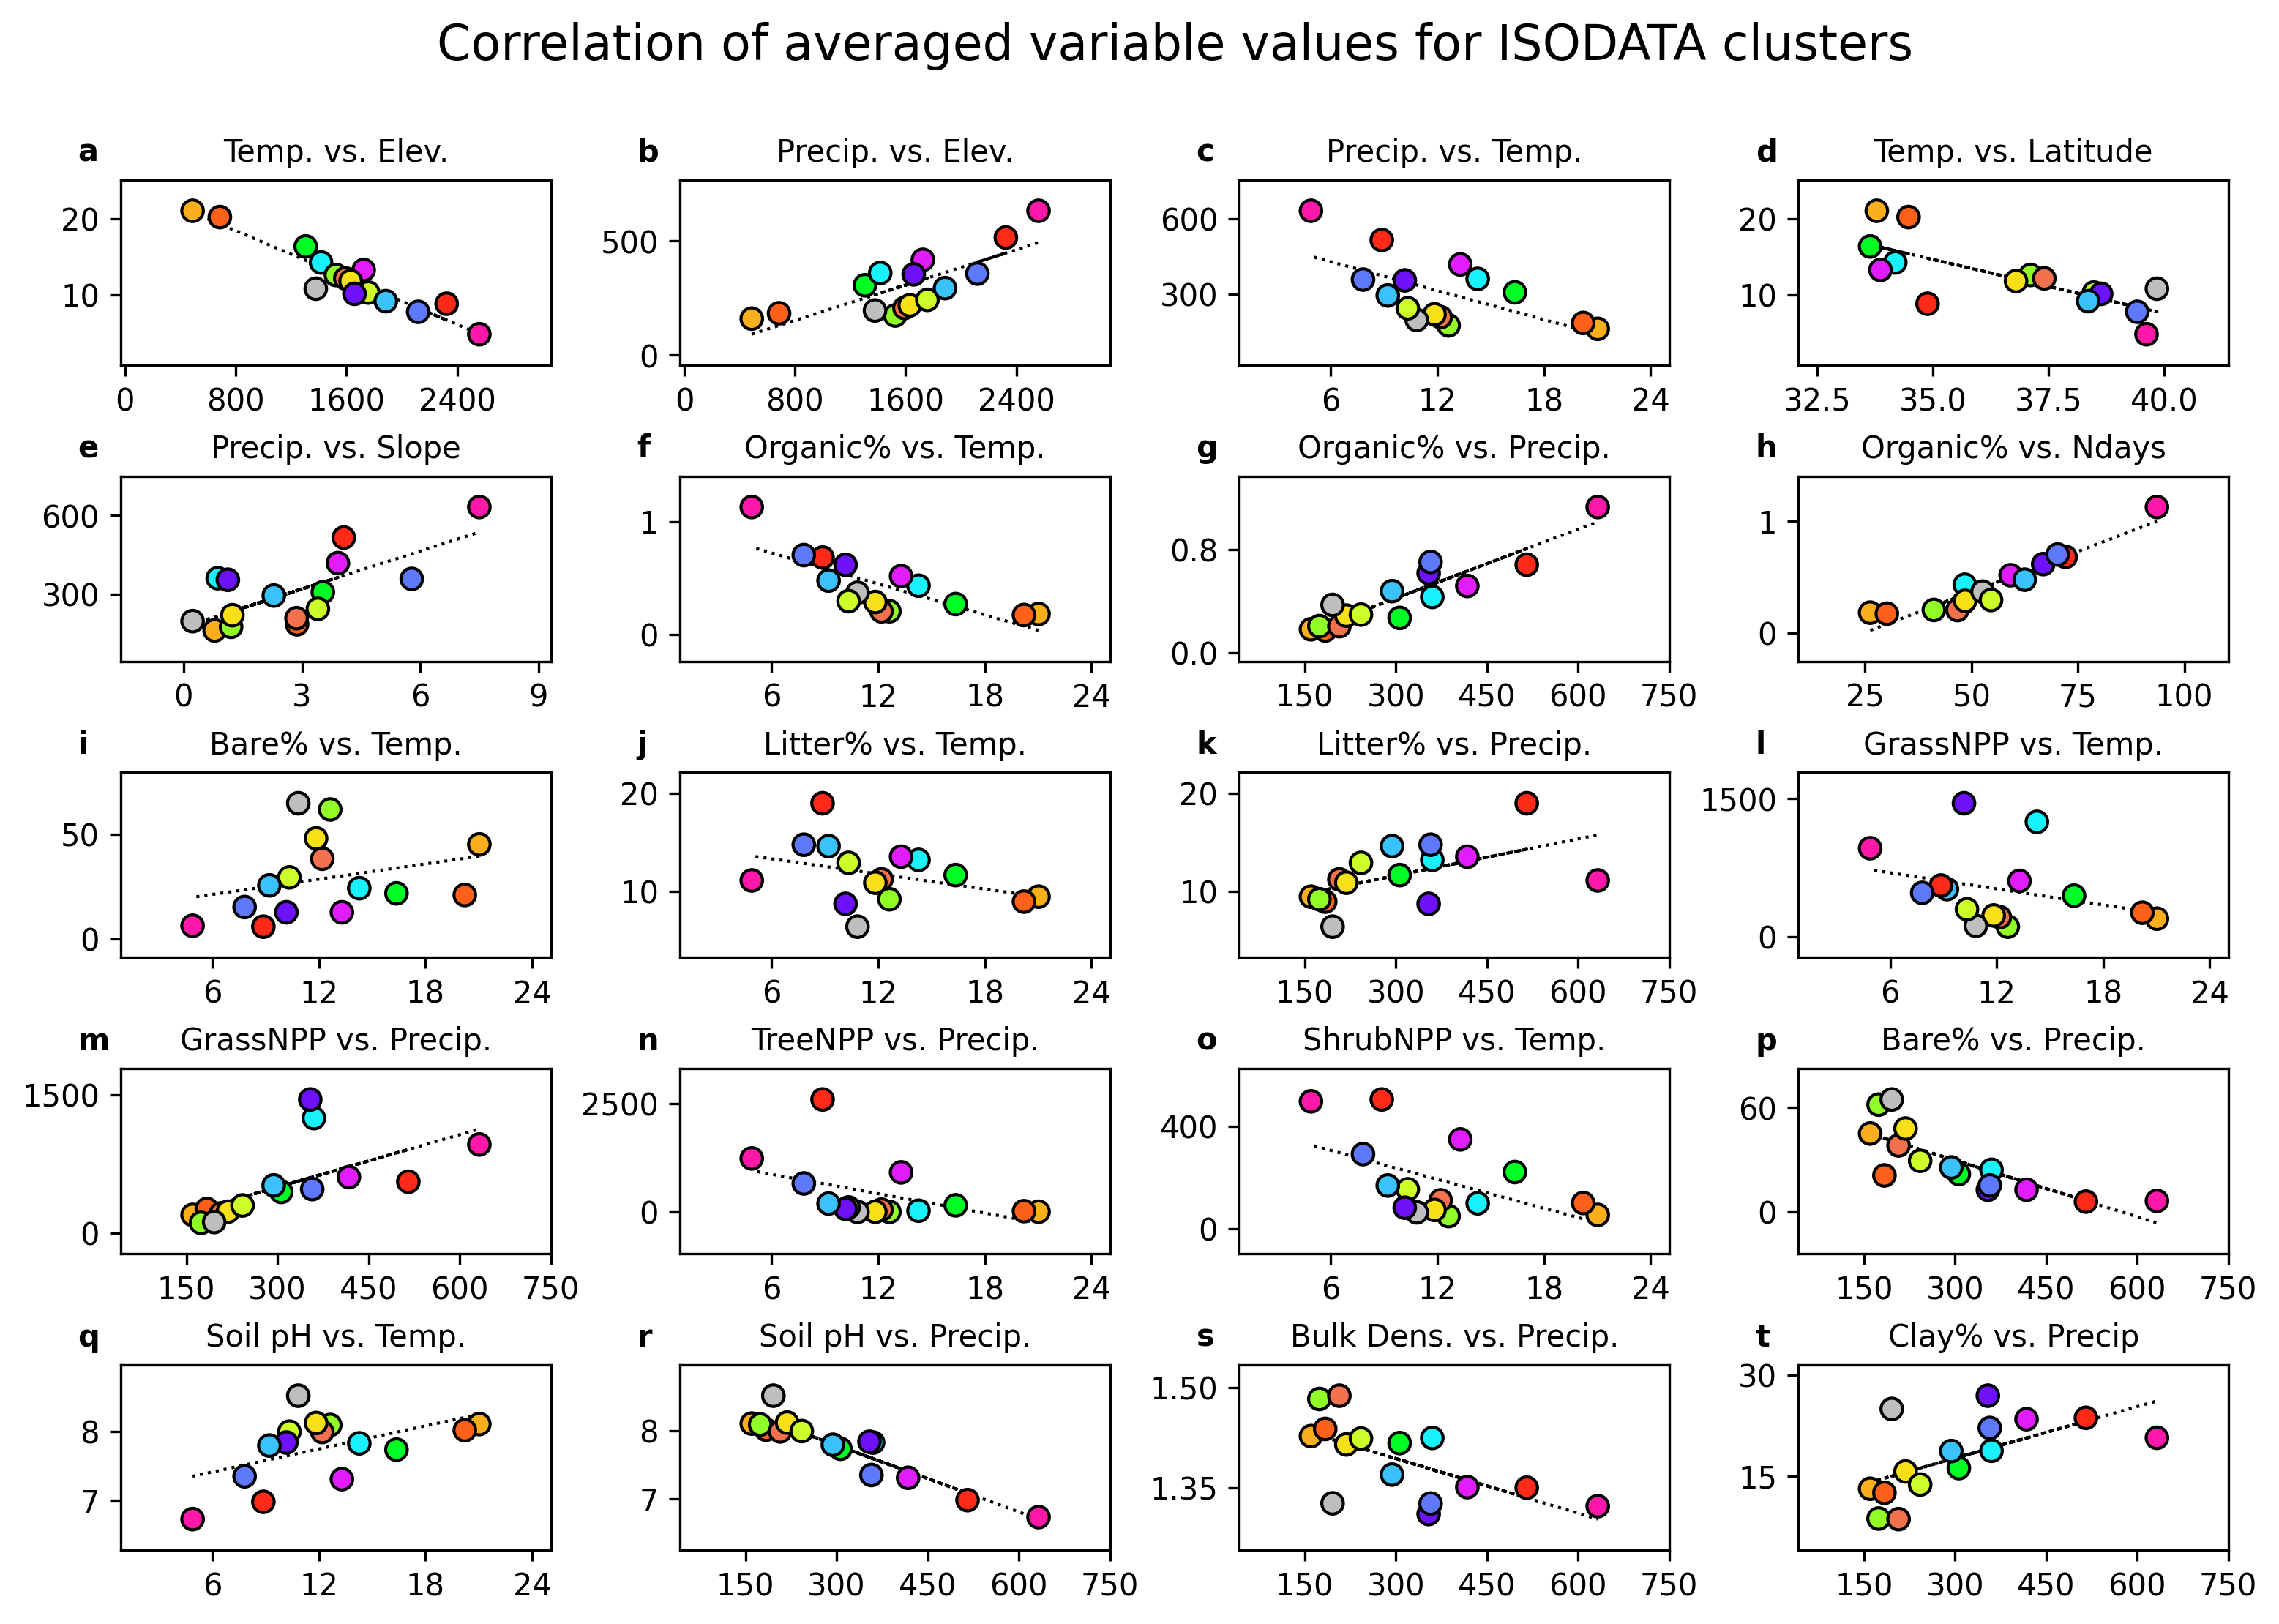

In [42]:
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os



zonalfld = '/content/drive/My Drive/Colab Notebooks/Analogs/Zonal'

files = os.listdir(zonalfld)
print(files)

files = [f for f in files if 'Zonal' in f and f[-4:] == '.csv' and 'eco3' not in f and 'eco4' not in f]
labels = [f.split('_')[1][:-4] for f in files]

colors = ['#91FE28', '#F4714F', '#FF611B', '#FBAF1C', '#F8E019', '#CCFE29', '#BDBEBE', '#00FE24', '#18F2FE', '#3AC2FD', '#5E79FD', '#6E12FC', '#E21DFD', '#FF18A9', '#FF2B18']

df = pd.DataFrame()
for i, f in enumerate(files):
  idf = pd.read_csv(os.path.join(zonalfld, f))
  df[labels[i]] = idf['MEAN']

df['orgm'] = df['orgm'].apply(lambda x: 10**x)

#TEMPERATURE-BASED CLASS ORDER
df.index.name = 'arc_id'
df['color'] = colors
temp_order_df = df.sort_values(by='tavg', ascending=False)
df = temp_order_df.reset_index()

arcid_list = [x+1 for x in df['arc_id'].tolist()]
class_list = list(range(1, len(arcid_list)+1))

arc_colors = df['color']

display(pd.DataFrame(data=arc_colors))

def plot_fn(ax):
  z = np.polyfit(x, y, deg=1)
  p = np.poly1d(z)
  ax.margins(0.25, 0.25)
  ax.plot(x, p(x), color='black', linestyle=':', linewidth=1, zorder=-999)
  ax.scatter(x, y, s=50, c=arc_colors, edgecolor='k')
  ymin, ymax = ax.get_ylim()[0], ax.get_ylim()[1]
  xmin, xmax = ax.get_xlim()[0], ax.get_xlim()[1]
  # for i in range(1, len(x)+1):
  #   ax.text(x[i-1] - 0.025*(xmax - xmin), y[i-1] + 0.025*(ymax - ymin), i, fontsize=9)

print('DONE')



fig, axes = plt.subplots(5, 4, figsize=(12, 8), dpi=300)
fig.suptitle('Correlation of averaged variable values for ISODATA clusters', y=0.97, fontsize=16)
plt.subplots_adjust(wspace=0.3, hspace=0.6, left=0.1, right=0.9, bottom=0.1)

letters = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't']



#ZONAL CORRELATION PLOTS

#########################################################################################

x = df['elev']
y = df['tavg']
axes[0, 0].set_title('Temp. vs. Elev.', fontsize=10)
axes[0, 0].text(-0.1, 1.1, letters[0], transform=axes[0, 0].transAxes, size=10, fontweight='bold')
axes[0, 0].xaxis.set_major_locator(ticker.MaxNLocator(nbins=4, min_n_ticks=4))
axes[0, 0].yaxis.set_major_locator(ticker.MaxNLocator(nbins=2, min_n_ticks=2))

plot_fn(axes[0, 0])

#########################################################################################

x = df['elev']
y = df['accm']
axes[0, 1].set_title('Precip. vs. Elev.', fontsize=10)
axes[0, 1].text(-0.1, 1.1, letters[1], transform=axes[0, 1].transAxes, size=10, fontweight='bold')
axes[0, 1].xaxis.set_major_locator(ticker.MaxNLocator(nbins=4, min_n_ticks=4))
axes[0, 1].yaxis.set_major_locator(ticker.MaxNLocator(nbins=2, min_n_ticks=2))
plot_fn(axes[0, 1])

#########################################################################################

x = df['tavg']
y = df['accm']
axes[0, 2].set_title('Precip. vs. Temp.', fontsize=10)
axes[0, 2].text(-0.1, 1.1, letters[2], transform=axes[0, 2].transAxes, size=10, fontweight='bold')
axes[0, 2].xaxis.set_major_locator(ticker.MaxNLocator(nbins=4, min_n_ticks=4))
axes[0, 2].yaxis.set_major_locator(ticker.MaxNLocator(nbins=2, min_n_ticks=2))
plot_fn(axes[0, 2])

#########################################################################################

x = df['ylat']
y = df['tavg']
axes[0, 3].set_title('Temp. vs. Latitude', fontsize=10)
axes[0, 3].text(-0.1, 1.1, letters[3], transform=axes[0, 3].transAxes, size=10, fontweight='bold')
axes[0, 3].xaxis.set_major_locator(ticker.MaxNLocator(nbins=4, min_n_ticks=4))
axes[0, 3].yaxis.set_major_locator(ticker.MaxNLocator(nbins=2, min_n_ticks=2))
plot_fn(axes[0, 3])

#########################################################################################

x = df['slpe']
y = df['accm']
axes[1, 0].set_title('Precip. vs. Slope', fontsize=10)
axes[1, 0].text(-0.1, 1.1, letters[4], transform=axes[1, 0].transAxes, size=10, fontweight='bold')
axes[1, 0].xaxis.set_major_locator(ticker.MaxNLocator(nbins=4, min_n_ticks=4))
axes[1, 0].yaxis.set_major_locator(ticker.MaxNLocator(nbins=2, min_n_ticks=2))
plot_fn(axes[1, 0])

#########################################################################################

x = df['tavg']
y = df['orgm']
axes[1, 1].set_title('Organic% vs. Temp.', fontsize=10)
axes[1, 1].text(-0.1, 1.1, letters[5], transform=axes[1, 1].transAxes, size=10, fontweight='bold')
axes[1, 1].xaxis.set_major_locator(ticker.MaxNLocator(nbins=4, min_n_ticks=4))
axes[1, 1].yaxis.set_major_locator(ticker.MaxNLocator(nbins=2, min_n_ticks=2))
plot_fn(axes[1, 1])

#########################################################################################

x = df['accm']
y = df['orgm']
axes[1, 2].set_title('Organic% vs. Precip.', fontsize=10)
axes[1, 2].text(-0.1, 1.1, letters[6], transform=axes[1, 2].transAxes, size=10, fontweight='bold')
axes[1, 2].xaxis.set_major_locator(ticker.MaxNLocator(nbins=4, min_n_ticks=4))
axes[1, 2].yaxis.set_major_locator(ticker.MaxNLocator(nbins=2, min_n_ticks=2))
plot_fn(axes[1, 2])

#########################################################################################

x = df['nday']
y = df['orgm']
axes[1, 3].set_title('Organic% vs. Ndays', fontsize=10)
axes[1, 3].text(-0.1, 1.1, letters[7], transform=axes[1, 3].transAxes, size=10, fontweight='bold')
axes[1, 3].xaxis.set_major_locator(ticker.MaxNLocator(nbins=4, min_n_ticks=4))
axes[1, 3].yaxis.set_major_locator(ticker.MaxNLocator(nbins=2, min_n_ticks=2))
plot_fn(axes[1, 3])

#########################################################################################

x = df['tavg']
y = df['bare']
axes[2, 0].set_title('Bare% vs. Temp.', fontsize=10)
axes[2, 0].text(-0.1, 1.1, letters[8], transform=axes[2, 0].transAxes, size=10, fontweight='bold')
axes[2, 0].xaxis.set_major_locator(ticker.MaxNLocator(nbins=4, min_n_ticks=4))
axes[2, 0].yaxis.set_major_locator(ticker.MaxNLocator(nbins=2, min_n_ticks=2))
plot_fn(axes[2, 0])

#########################################################################################

x = df['tavg']
y = df['litr']
axes[2, 1].set_title('Litter% vs. Temp.', fontsize=10)
axes[2, 1].text(-0.1, 1.1, letters[9], transform=axes[2, 1].transAxes, size=10, fontweight='bold')
axes[2, 1].xaxis.set_major_locator(ticker.MaxNLocator(nbins=4, min_n_ticks=4))
axes[2, 1].yaxis.set_major_locator(ticker.MaxNLocator(nbins=2, min_n_ticks=2))
plot_fn(axes[2, 1])

#########################################################################################

x = df['accm']
y = df['litr']
axes[2, 2].set_title('Litter% vs. Precip.', fontsize=10)
axes[2, 2].text(-0.1, 1.1, letters[10], transform=axes[2, 2].transAxes, size=10, fontweight='bold')
axes[2, 2].xaxis.set_major_locator(ticker.MaxNLocator(nbins=4, min_n_ticks=4))
axes[2, 2].yaxis.set_major_locator(ticker.MaxNLocator(nbins=2, min_n_ticks=2))
plot_fn(axes[2, 2])

#########################################################################################

x = df['tavg']
y = df['graN']
axes[2, 3].set_title('GrassNPP vs. Temp.', fontsize=10)
axes[2, 3].text(-0.1, 1.1, letters[11], transform=axes[2, 3].transAxes, size=10, fontweight='bold')
axes[2, 3].xaxis.set_major_locator(ticker.MaxNLocator(nbins=4, min_n_ticks=4))
axes[2, 3].yaxis.set_major_locator(ticker.MaxNLocator(nbins=2, min_n_ticks=2))
plot_fn(axes[2, 3])

#########################################################################################

x = df['accm']
y = df['graN']
axes[3, 0].set_title('GrassNPP vs. Precip.', fontsize=10)
axes[3, 0].text(-0.1, 1.1, letters[12], transform=axes[3, 0].transAxes, size=10, fontweight='bold')
axes[3, 0].xaxis.set_major_locator(ticker.MaxNLocator(nbins=4, min_n_ticks=4))
axes[3, 0].yaxis.set_major_locator(ticker.MaxNLocator(nbins=2, min_n_ticks=2))
plot_fn(axes[3, 0])

#########################################################################################

x = df['tavg']
y = df['tree']
axes[3, 1].set_title('TreeNPP vs. Precip.', fontsize=10)
axes[3, 1].text(-0.1, 1.1, letters[13], transform=axes[3, 1].transAxes, size=10, fontweight='bold')
axes[3, 1].xaxis.set_major_locator(ticker.MaxNLocator(nbins=4, min_n_ticks=4))
axes[3, 1].yaxis.set_major_locator(ticker.MaxNLocator(nbins=2, min_n_ticks=2))
plot_fn(axes[3, 1])

#########################################################################################

x = df['tavg']
y = df['shrN']
axes[3, 2].set_title('ShrubNPP vs. Temp.', fontsize=10)
axes[3, 2].text(-0.1, 1.1, letters[14], transform=axes[3, 2].transAxes, size=10, fontweight='bold')
axes[3, 2].xaxis.set_major_locator(ticker.MaxNLocator(nbins=4, min_n_ticks=4))
axes[3, 2].yaxis.set_major_locator(ticker.MaxNLocator(nbins=2, min_n_ticks=2))
plot_fn(axes[3, 2])

########################################################################################

x = df['accm']
y = df['bare']
axes[3, 3].set_title('Bare% vs. Precip.', fontsize=10)
axes[3, 3].text(-0.1, 1.1, letters[15], transform=axes[3, 3].transAxes, size=10, fontweight='bold')
axes[3, 3].xaxis.set_major_locator(ticker.MaxNLocator(nbins=4, min_n_ticks=4))
axes[3, 3].yaxis.set_major_locator(ticker.MaxNLocator(nbins=2, min_n_ticks=2))
plot_fn(axes[3, 3])

#########################################################################################

x = df['tavg']
y = df['pphh']
axes[4, 0].set_title('Soil pH vs. Temp.', fontsize=10)
axes[4, 0].text(-0.1, 1.1, letters[16], transform=axes[4, 0].transAxes, size=10, fontweight='bold')
axes[4, 0].xaxis.set_major_locator(ticker.MaxNLocator(nbins=4, min_n_ticks=4))
axes[4, 0].yaxis.set_major_locator(ticker.MaxNLocator(nbins=2, min_n_ticks=2))
plot_fn(axes[4, 0])

#########################################################################################

x = df['accm']
y = df['pphh']
axes[4, 1].set_title('Soil pH vs. Precip.', fontsize=10)
axes[4, 1].text(-0.1, 1.1, letters[17], transform=axes[4, 1].transAxes, size=10, fontweight='bold')
axes[4, 1].xaxis.set_major_locator(ticker.MaxNLocator(nbins=4, min_n_ticks=4))
axes[4, 1].yaxis.set_major_locator(ticker.MaxNLocator(nbins=2, min_n_ticks=2))
plot_fn(axes[4, 1])

#########################################################################################

x = df['accm']
y = df['bulk']
axes[4, 2].set_title('Bulk Dens. vs. Precip.', fontsize=10)
axes[4, 2].text(-0.1, 1.1, letters[18], transform=axes[4, 2].transAxes, size=10, fontweight='bold')
axes[4, 2].xaxis.set_major_locator(ticker.MaxNLocator(nbins=4, min_n_ticks=4))
axes[4, 2].yaxis.set_major_locator(ticker.MaxNLocator(nbins=2, min_n_ticks=2))
plot_fn(axes[4, 2])

#########################################################################################

x = df['accm']
y = df['clay']
axes[4, 3].set_title('Clay% vs. Precip', fontsize=10)
axes[4, 3].text(-0.1, 1.1, letters[19], transform=axes[4, 3].transAxes, size=10, fontweight='bold')
axes[4, 3].xaxis.set_major_locator(ticker.MaxNLocator(nbins=4, min_n_ticks=4))
axes[4, 3].yaxis.set_major_locator(ticker.MaxNLocator(nbins=2, min_n_ticks=2))
plot_fn(axes[4, 3])

fig.savefig('/content/drive/My Drive/Colab Notebooks/Analogs/Figure_ScatterPlot.png', dpi='figure')


